In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("online_retail.csv", dtype={'CustomerID': str,'InvoiceID': str}, encoding="ISO-8859-1")
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format="%m/%d/%Y %H:%M")

In [3]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB
None


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [4]:
# 결측 데이터 제거
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df = df.dropna()
print(df.shape)

(406829, 8)


In [6]:
# 탐색 데이터 조건 필터링
# 상품수량이 음수인 경우를 제거합니다.
print(df[df['Quantity']<=0].shape[0])
df = df[df['Quantity']>0]

8905


In [7]:
print(df[df['UnitPrice']<=0].shape[0])
df = df[df['UnitPrice']>0]

40


In [8]:
df['ContainDigit'] = df['StockCode'].apply(lambda x: any(c.isdigit() for c in x))
print(df[df['ContainDigit'] == False].shape[0])
df[df['ContainDigit'] == False].head()

1414


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ContainDigit
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583,France,False
386,536403,POST,POSTAGE,1,2010-12-01 11:27:00,15.00,12791,Netherlands,False
1123,536527,POST,POSTAGE,1,2010-12-01 13:04:00,18.00,12662,Germany,False
2239,536569,M,Manual,1,2010-12-01 15:35:00,1.25,16274,United Kingdom,False
2250,536569,M,Manual,1,2010-12-01 15:35:00,18.95,16274,United Kingdom,False


In [9]:
df = df[df['ContainDigit'] == True]

In [10]:
# 일자별 거래 데이터 분석
df['date'] = df['InvoiceDate'].dt.date
print(df['date'].min())
print(df['date'].max())

2010-12-01
2011-12-09


<Axes: xlabel='date'>

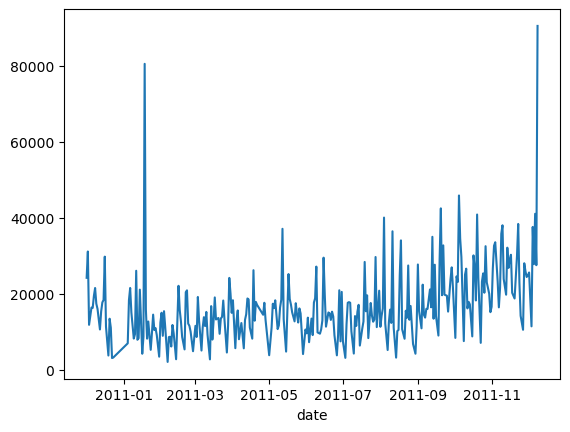

In [11]:
date_quantity_series = df.groupby('date')['Quantity'].sum()
date_quantity_series.plot()

<Axes: xlabel='date'>

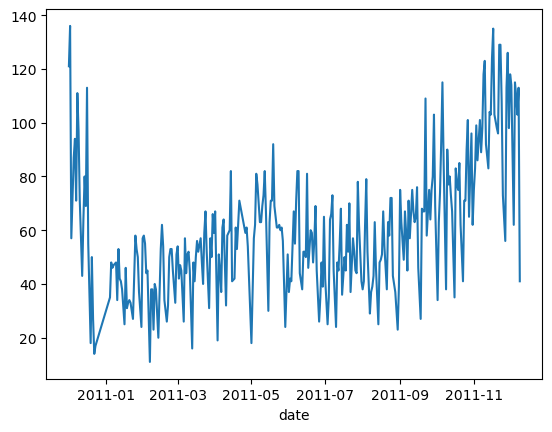

In [12]:
date_transaction_series = df.groupby('date')['InvoiceNo'].nunique()
date_transaction_series.plot()

<Axes: xlabel='date'>

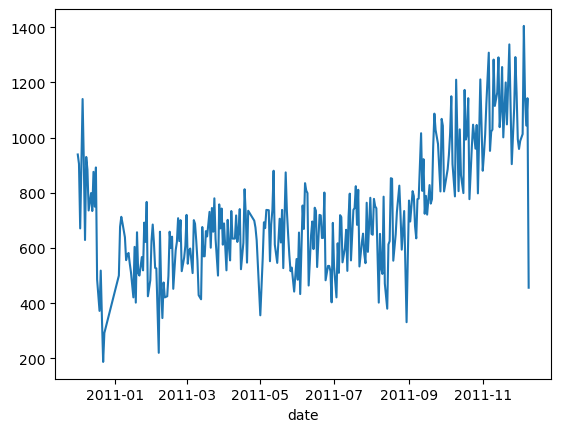

In [14]:
date_unique_item_series = df.groupby('date')['StockCode'].nunique()
date_unique_item_series.plot()

In [15]:
# 유저별 구매 패턴 분석
print(len(df['CustomerID'].unique()))

4334


In [16]:
customer_unique_transaction_series = df.groupby('CustomerID')['InvoiceNo'].nunique()
customer_unique_transaction_series.describe()

count    4334.000000
mean        4.246654
std         7.642535
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max       206.000000
Name: InvoiceNo, dtype: float64

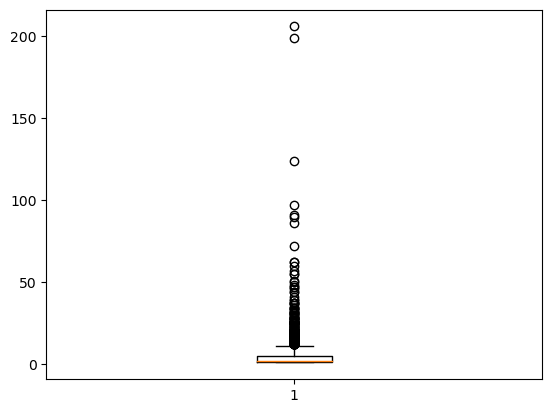

In [17]:
plt.boxplot(customer_unique_transaction_series.values)
plt.show()

In [18]:
customer_unique_item_series = df.groupby('CustomerID')['StockCode'].nunique()
customer_unique_item_series.describe()

count    4334.000000
mean       61.432856
std        85.312937
min         1.000000
25%        16.000000
50%        35.000000
75%        77.000000
max      1786.000000
Name: StockCode, dtype: float64

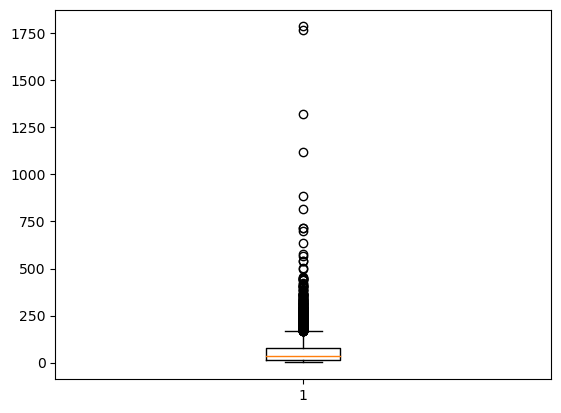

In [19]:
plt.boxplot(customer_unique_item_series.values)
plt.show()

In [20]:
import datetime

df_year_round = df[df['date'] < datetime.date(2011, 11, 1)]
df_year_end = df[df['date'] >= datetime.date(2011, 11, 1)]
print(df_year_round.shape)
print(df_year_end.shape)

(314902, 10)
(81568, 10)


In [21]:
customer_item_round_set = df_year_round.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_round_set)

CustomerID
12346                                              {23166}
12347    {23506, 22992, 84625C, 22771, 21791, 51014C, 2...
12348    {21977, 22952, 84992, 21981, 23077, 21983, 212...
12350    {22551, 20615, 79066K, 79191C, 84086C, 22348, ...
12352    {22780, 84510A, 22634, 22646, 21731, 37495, 22...
                               ...                        
18280    {22358, 22495, 22611, 22499, 22084, 22725, 824...
18281    {23008, 23007, 22716, 22037, 23209, 22467, 22028}
18282    {21270, 22424, 23187, 21108, 23295, 22089, 21109}
18283    {23506, 21872, 22586, 22746, 21977, 22749, 224...
18287    {22419, 22752, 23223, 84507C, 22065, 22600, 22...
Name: StockCode, Length: 3970, dtype: object


In [22]:
customer_item_dict = {}

for customer_id, stocks in customer_item_round_set.items():
    customer_item_dict[customer_id] = {}
    for stock_code in stocks:
        customer_item_dict[customer_id][stock_code] = 'old'

print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'23506': 'old', '22992': 'old', '84625C': 'old', '22771': 'old...


In [23]:
customer_item_end_set = df_year_end.groupby('CustomerID')['StockCode'].apply(set)
print(customer_item_end_set)

CustomerID
12347    {23506, 20719, 84625A, 23084, 23497, 21731, 21...
12349    {23112, 22070, 22556, 23439, 48185, 23294, 232...
12352    {23096, 22982, 22624, 22178, 22978, 21669, 233...
12356                                       {21843, 22423}
12357    {22815, 21039, 22716, 23341, 22306, 22846, 214...
                               ...                        
18272    {23358, 22074, 23236, 23113, 23240, 72799C, 72...
18273                                             {79302M}
18274    {23243, 84988, 23245, 21231, 22423, 22720, 211...
18282                  {23175, 22423, 22818, 23174, 22699}
18283    {23506, 22952, 23294, 23551, 21791, 22731, 232...
Name: StockCode, Length: 1904, dtype: object


In [25]:
for customer_id, stocks in customer_item_end_set.items():
    if customer_id in customer_item_dict:
        for stock_code in stocks:
            if stock_code in customer_item_dict[customer_id]:
                customer_item_dict[customer_id][stock_code] = 'both'
            else:
                customer_item_dict[customer_id][stock_code] = 'new'
    
    else:
        customer_item_dict[customer_id] = {}
        for stock_code in stocks:
            customer_item_dict[customer_id][stock_code] = 'new'

print(str(customer_item_dict)[:100] + "...")

{'12346': {'23166': 'old'}, '12347': {'23506': 'both', '22992': 'old', '84625C': 'old', '22771': 'ol...


In [26]:
columns = ['CustomerID', 'old', 'new', 'both']
df_order_info = pd.DataFrame(columns=columns)

for customer_id in customer_item_dict:
    old = 0
    new = 0
    both = 0
    
    for stock_code in customer_item_dict[customer_id]:
        status = customer_item_dict[customer_id][stock_code]
        if status == 'old':
            old += 1
        elif status == 'new':
            new += 1
        else:
            both += 1
    
    row = [customer_id, old, new, both]
    series = pd.Series(row, index=columns)
    df_order_info = df_order_info.append(series, ignore_index=True)

df_order_info.head()

,CustomerID,old,new,both
0,12346,1,0,0
1,12347,92,0,11
2,12348,21,0,0
3,12350,16,0,0
4,12352,43,0,14


In [27]:
print(df_order_info.shape[0])
print(df_order_info[(df_order_info['old'] > 0) & (df_order_info['new'] > 0)].shape[0])
print(df_order_info[df_order_info['both'] > 0].shape[0])

4334
0
1904


In [28]:
df_order_info['new'].value_counts()

0    4334
Name: new, dtype: int64

In [29]:
print(df_order_info['new'].value_counts()[1:].describe())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: new, dtype: float64


In [30]:
print(len(df_year_round['CustomerID'].unique()))
print(len(df_year_round['StockCode'].unique()))

3970
3608


In [31]:
uir_df = df_year_round.groupby(['CustomerID', 'StockCode'])['InvoiceNo'].nunique().reset_index()
uir_df.head()

,CustomerID,StockCode,InvoiceNo
0,12346,23166,1
1,12347,16008,1
2,12347,17021,1
3,12347,20665,1
4,12347,20719,3


<Axes: >

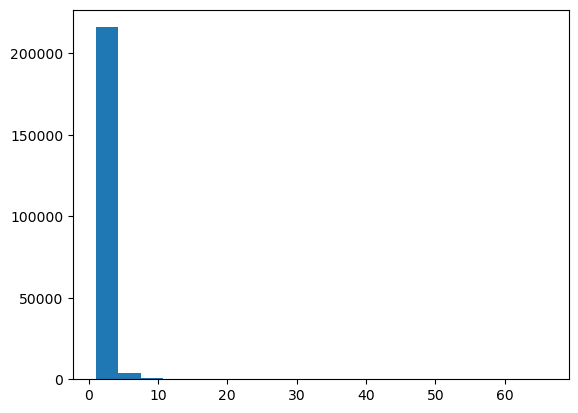

In [32]:
uir_df['InvoiceNo'].hist(bins=20, grid=False)

<Axes: >

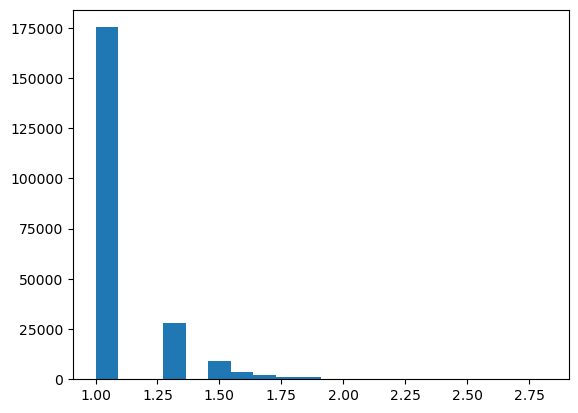

In [33]:
uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1).hist(bins=20, grid=False)

<Axes: >

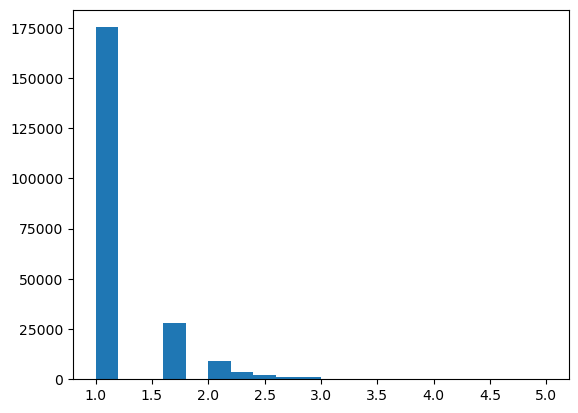

In [34]:
uir_df['Rating'] = uir_df['InvoiceNo'].apply(lambda x: np.log10(x)+1)
uir_df['Rating'] = ((uir_df['Rating'] - uir_df['Rating'].min()) / 
                    (uir_df['Rating'].max() - uir_df['Rating'].min()) * 4) + 1
uir_df['Rating'].hist(bins=20, grid=False)

In [35]:
uir_df = uir_df[['CustomerID', 'StockCode', 'Rating']]
uir_df.head()

,CustomerID,StockCode,Rating
0,12346,23166,1.000000
1,12347,16008,1.000000
2,12347,17021,1.000000
3,12347,20665,1.000000
4,12347,20719,2.048881


In [36]:
import time
from surprise import SVD, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data, test_data = train_test_split(data, test_size=0.2)

train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

predictions = model.test(test_data)

print("RMSE of test dataset in SVD model:")
accuracy.rmse(predictions)

training time of model: 9.14 seconds
RMSE of test dataset in SVD model:
RMSE: 0.3363


0.3363456146501402

In [37]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(uir_df[['CustomerID', 'StockCode', 'Rating']], reader)
train_data = data.build_full_trainset()

train_start = time.time()
model = SVD(n_factors=8,
            lr_all=0.005,
            reg_all=0.02,
            n_epochs=200)
model.fit(train_data)
train_end = time.time()
print("training time of model: %.2f seconds" % (train_end - train_start))

training time of model: 5.84 seconds


In [38]:
test_data = train_data.build_anti_testset()
target_user_predictions = model.test(test_data)

new_order_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in new_order_prediction_dict:
        if stock_code in new_order_prediction_dict[customer_id]:
            pass
        else:
            new_order_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        new_order_prediction_dict[customer_id] = {}
        new_order_prediction_dict[customer_id][stock_code] = predicted_rating

print(str(new_order_prediction_dict)[:300] + "...")

{'12346': {'16008': 1.0201989834310214, '17021': 1.2261644307820592, '20665': 1.051769704007324, '20719': 1.41331614739591, '20780': 1.0963742476118072, '20782': 1.1505804920028222, '20966': 1.0618268491118026, '21035': 1.1170043488941774, '21041': 1.1242198125883098, '21064': 1.2476962153655273, '2...


In [39]:
test_data = train_data.build_testset()
target_user_predictions = model.test(test_data)

reorder_prediction_dict = {}
for customer_id, stock_code, _, predicted_rating, _ in target_user_predictions:
    if customer_id in reorder_prediction_dict:
        if stock_code in reorder_prediction_dict[customer_id]:
            pass
        else:
            reorder_prediction_dict[customer_id][stock_code] = predicted_rating
    else:
        reorder_prediction_dict[customer_id] = {}
        reorder_prediction_dict[customer_id][stock_code] = predicted_rating
        
print(str(reorder_prediction_dict)[:300] + "...")

{'12346': {'23166': 1.0284414129379345}, '12347': {'16008': 1.1162506228536537, '17021': 1.2467410497289064, '20665': 1.1196081507284728, '20719': 2.010075681902218, '20780': 1.0603461400196412, '20782': 1.3087744495402351, '20966': 1.413765615788598, '21035': 1.4802243517371294, '21041': 1.57854412...


In [40]:
total_prediction_dict = {}

for customer_id in new_order_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in new_order_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
for customer_id in reorder_prediction_dict:
    if customer_id not in total_prediction_dict:
        total_prediction_dict[customer_id] = {}
    for stock_code, predicted_rating in reorder_prediction_dict[customer_id].items():
        if stock_code not in total_prediction_dict[customer_id]:
            total_prediction_dict[customer_id][stock_code] = predicted_rating
            
print(str(total_prediction_dict)[:300] + "...")

{'12346': {'16008': 1.0201989834310214, '17021': 1.2261644307820592, '20665': 1.051769704007324, '20719': 1.41331614739591, '20780': 1.0963742476118072, '20782': 1.1505804920028222, '20966': 1.0618268491118026, '21035': 1.1170043488941774, '21041': 1.1242198125883098, '21064': 1.2476962153655273, '2...


In [41]:
simulation_test_df = df_year_end.groupby('CustomerID')['StockCode'].apply(set).reset_index()
simulation_test_df.columns = ['CustomerID', 'RealOrdered']
simulation_test_df.head()

,CustomerID,RealOrdered
0,12347,"{23506, 20719, 84625A, 23084, 23497, 21731, 21..."
1,12349,"{23112, 22070, 22556, 23439, 48185, 23294, 232..."
2,12352,"{23096, 22982, 22624, 22178, 22978, 21669, 233..."
3,12356,"{21843, 22423}"
4,12357,"{22815, 21039, 22716, 23341, 22306, 22846, 214..."


In [42]:
def add_predicted_stock_set(customer_id, prediction_dict):
    if customer_id in prediction_dict:
        predicted_stock_dict = prediction_dict[customer_id]
        sorted_stocks = sorted(predicted_stock_dict, key=lambda x : predicted_stock_dict[x], reverse=True)
        return sorted_stocks
    else:
        return None

simulation_test_df['PredictedOrder(New)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, new_order_prediction_dict))
simulation_test_df['PredictedOrder(Reorder)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, reorder_prediction_dict))
simulation_test_df['PredictedOrder(Total)'] = simulation_test_df['CustomerID']. \
                                            apply(lambda x: add_predicted_stock_set(x, total_prediction_dict))
simulation_test_df.head()

,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total)
0,12347,"{23506, 20719, 84625A, 23084, 23497, 21731, 21...","[22326, 21137, 22998, 22041, 22467, 85099B, 85...","[22726, 21731, 20719, 22725, 21975, 22727, 224...","[22326, 21137, 22998, 22041, 22467, 85099B, 85..."
1,12349,"{23112, 22070, 22556, 23439, 48185, 23294, 232...",None,None,None
2,12352,"{23096, 22982, 22624, 22178, 22978, 21669, 233...","[90119, 84086B, 85131B, 90035A, 85131D, 90042A...","[22779, 22780, 37448, 22701, 22138, 22645, 226...","[90119, 84086B, 85131B, 90035A, 85131D, 90042A..."
3,12356,"{21843, 22423}","[84086B, 85131B, 90119, C2, 22197, 85099B, 851...","[22423, 21843, 22649, 37450, 22699, 21080, 211...","[84086B, 85131B, 90119, C2, 22197, 85099B, 851..."
4,12357,"{22815, 21039, 22716, 23341, 22306, 22846, 214...",None,None,None


In [43]:
def calculate_recall(real_order, predicted_order, k):
    if predicted_order is None:
        return None
    
    predicted = predicted_order[:k]
    true_positive = 0
    for stock_code in predicted:
        if stock_code in real_order:
            true_positive += 1
    
    recall = true_positive / len(predicted)
    return recall

simulation_test_df['top_k_recall(Reorder)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Reorder)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(New)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(New)'], 
                                                                                 5), axis=1)
simulation_test_df['top_k_recall(Total)'] = simulation_test_df. \
                                                apply(lambda x: calculate_recall(x['RealOrdered'], 
                                                                                 x['PredictedOrder(Total)'], 
                                                                                 5), axis=1)

In [44]:
print(simulation_test_df['top_k_recall(Reorder)'].mean())
print(simulation_test_df['top_k_recall(New)'].mean())
print(simulation_test_df['top_k_recall(Total)'].mean())

0.31269480519480525
0.005584415584415585
0.06571428571428571


In [45]:
simulation_test_df['top_k_recall(Reorder)'].value_counts()

0.000000    460
0.200000    413
0.400000    263
0.600000    186
0.800000    128
1.000000     71
0.500000      7
0.250000      6
0.666667      4
0.750000      1
0.333333      1
Name: top_k_recall(Reorder), dtype: int64

In [46]:
simulation_test_df['top_k_recall(New)'].value_counts()

0.0    1499
0.2      39
0.4       2
Name: top_k_recall(New), dtype: int64

In [47]:
simulation_test_df['top_k_recall(Total)'].value_counts()

0.0    1230
0.2     196
0.4      61
0.6      30
0.8      17
1.0       6
Name: top_k_recall(Total), dtype: int64

In [48]:
not_recommended_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].isnull()]
print(not_recommended_df.shape)
not_recommended_df.head()

(364, 8)


,CustomerID,RealOrdered,PredictedOrder(New),PredictedOrder(Reorder),PredictedOrder(Total),top_k_recall(Reorder),top_k_recall(New),top_k_recall(Total)
1,12349,"{23112, 22070, 22556, 23439, 48185, 23294, 232...",None,None,None,NaN,NaN,NaN
4,12357,"{22815, 21039, 22716, 23341, 22306, 22846, 214...",None,None,None,NaN,NaN,NaN
8,12367,"{22631, 22708, 22045, 22629, 21576, 21770, 215...",None,None,None,NaN,NaN,NaN
9,12374,"{72741, 22733, 21485, 85174, 84992, 22735, 217...",None,None,None,NaN,NaN,NaN
15,12391,"{22586, 22141, 23126, 22749, 47566, 23214, 231...",None,None,None,NaN,NaN,NaN


In [52]:
k = 5
result_df = simulation_test_df[simulation_test_df['PredictedOrder(Reorder)'].notnull()]
result_df['PredictedOrder(Reorder)'] = result_df['PredictedOrder(Reorder)'].\
                                                        apply(lambda x: x[:k])
result_df = result_df[['CustomerID', 'RealOrdered', 
                       'PredictedOrder(Reorder)', 'top_k_recall(Reorder)']]
result_df.columns = [['구매자ID', '실제주문', '5개추천결과', 'Top5추천_주문재현도']]
result_df.sample(5).head()

,구매자ID,실제주문,5개추천결과,Top5추천_주문재현도
212,12952,"{23534, 22847, 23403, 22867, 23013, 22624, 228...","[21181, 21169, 48138, 84879, 23336]",0.2
185,12877,"{23506, 22942, 22661, 20719, 23242, 21900, 229...","[22355, 20719, 20724, 20723, 79321]",0.6
1313,16500,"{23489, 22792, 22086, 23480, 23493, 22791, 23431}",[22827],0.0
642,14360,"{22113, 23474, 22029, 23583, 23473, 22910, 234...","[15036, 22112, 22411, 22113, 84879]",0.2
1271,16364,"{22942, 22029, 22867, 23075, 22109, 21832, 213...","[22197, 22109, 22035, 20982, 22904]",0.2
